In [1]:
import pandas as pd
import numpy as np

# Įkeliam duomenis
df = pd.read_csv("normalized_NO_missing_1498_6.csv")

# Atskiriam požymius ir klases
X = df.drop(columns=['label']).values
y = df['label'].values

print("Duomenų forma:", X.shape)


Duomenų forma: (1498, 6)


In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt


In [3]:
# Hiperparametrų reikšmės, kurias testuosime
param_grid = {
    "perplexity": [5, 20, 30, 50],
    "learning_rate": [50, 100, 200, 400],
    "early_exaggeration": [4, 12, 24]
}


In [4]:
results = []

for perplexity in param_grid["perplexity"]:
    for lr in param_grid["learning_rate"]:
        for exaggeration in param_grid["early_exaggeration"]:
            print(f"-> Testuojama: perplexity={perplexity}, lr={lr}, exaggeration={exaggeration}")

            tsne = TSNE(
                n_components=2,
                perplexity=perplexity,
                learning_rate=lr,
                early_exaggeration=exaggeration,
                n_iter=1000,
                metric="euclidean",
                init="pca",
                random_state=67
            )

            X_embedded = tsne.fit_transform(X)

            # KMeans klasterizacija (pagal klasių skaičių)
            kmeans = KMeans(n_clusters=3, n_init=10, random_state=67)
            labels_pred = kmeans.fit_predict(X_embedded)

            # Skaičiuojam kokybės metrikas
            silhouette = silhouette_score(X_embedded, labels_pred)
            ch_score = calinski_harabasz_score(X_embedded, labels_pred)

            results.append({
                "perplexity": perplexity,
                "learning_rate": lr,
                "early_exaggeration": exaggeration,
                "silhouette": silhouette,
                "calinski_harabasz": ch_score
            })


-> Testuojama: perplexity=5, lr=50, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=50, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=50, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=100, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=100, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=100, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=200, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=200, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=200, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=400, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=400, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=5, lr=400, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=50, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=50, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=50, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=100, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=100, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=100, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=200, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=200, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=200, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=400, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=400, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=20, lr=400, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=50, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=50, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=50, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=100, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=100, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=100, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=200, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=200, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=200, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=400, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=400, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=30, lr=400, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=50, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=50, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=50, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=100, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=100, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=100, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=200, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=200, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=200, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=400, exaggeration=4


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=400, exaggeration=12


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


-> Testuojama: perplexity=50, lr=400, exaggeration=24


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [5]:
results_df = pd.DataFrame(results)

# Rūšiuojam pagal Silhouette score
best_results = results_df.sort_values(by="silhouette", ascending=False)
display(best_results.head(10))


,perplexity,learning_rate,early_exaggeration,silhouette,calinski_harabasz
45,50,400,4,0.493605,1746.283813
41,50,100,24,0.490658,1727.226196
38,50,50,24,0.483449,1682.431030
37,50,50,12,0.479321,1653.418091
47,50,400,24,0.478914,1554.804932
44,50,200,24,0.473568,1519.685913
43,50,200,12,0.472376,1429.516602
40,50,100,12,0.471880,1521.808350
42,50,200,4,0.470259,1526.144043
33,30,400,4,0.468700,1561.502197


Geriausi parametrai:
perplexity              50.000000
learning_rate          400.000000
early_exaggeration       4.000000
silhouette               0.493605
calinski_harabasz     1746.283813
Name: 45, dtype: float64


/Users/robertajurpalyte/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


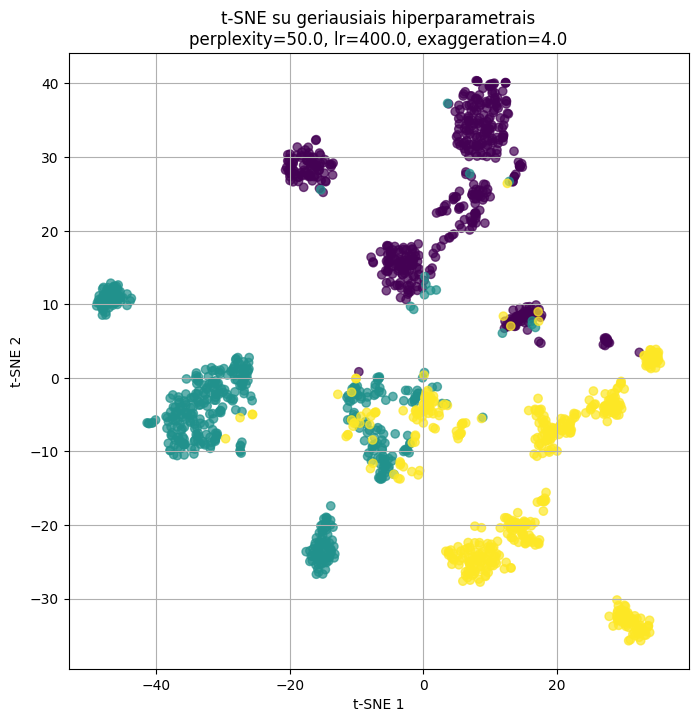

In [6]:
best = best_results.iloc[0]
print("Geriausi parametrai:")
print(best)

# Sukuriam t-SNE su geriausiais hiperparametrais
tsne_best = TSNE(
    n_components=2,
    perplexity=best.perplexity,
    learning_rate=best.learning_rate,
    early_exaggeration=best.early_exaggeration,
    n_iter=1000,
    metric="euclidean",
    init="pca",
    random_state=67
)

# Atliekam dimensijų mažinimą
X_tsne = tsne_best.fit_transform(X)

# Vizualizacijos parametrai
colors = ['red', 'blue', 'green']
class_labels = ['0', '1', '2']
markers = {
    'normal': 'o',       # normalūs
    'conditional': 's',  # sąlyginės
    'extreme': 'x'       # ekstremalios
}

plt.figure(figsize=(10, 10))

for i, color in enumerate(colors):
    # normalūs
    plt.scatter(
        X_tsne[(y_class == i) & (y_group == i), 0],
        X_tsne[(y_class == i) & (y_group == i), 1],
        color=color,
        marker=markers['normal'],
        label=class_labels[i],
        alpha=0.33,
    )
    # sąlyginės
    plt.scatter(
        X_tsne[(y_class == i) & (y_group == 3), 0],
        X_tsne[(y_class == i) & (y_group == 3), 1],
        color=color,
        marker=markers['conditional'],
        label=f"{class_labels[i]} – sąlyginės",
        alpha=0.66,
    )
    # ekstremalios
    plt.scatter(
        X_tsne[(y_class == i) & (y_group == 4), 0],
        X_tsne[(y_class == i) & (y_group == 4), 1],
        color=color,
        marker=markers['extreme'],
        label=f"{class_labels[i]} – ekstremalios",
        alpha=1,
    )

plt.title(
    f"t-SNE vizualizacija: klasės ir išskirtys\n"
    f"(perplexity={best.perplexity}, lr={best.learning_rate}, exaggeration={best.early_exaggeration})"
)
plt.xlabel("t-SNE 1 dimensija")
plt.ylabel("t-SNE 2 dimensija")
plt.legend(loc="best")
plt.grid(True)
plt.show()
